In [4]:
import kagglehub
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = kagglehub.dataset_download("pablomgomez21/drugs-a-b-c-x-y-for-decision-trees")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/drugs-a-b-c-x-y-for-decision-trees
['drug200.csv']


In [6]:
df = pd.read_csv('/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


<h3> Preprocessing Data </h3>

In [9]:
df['Sex'] = df['Sex'].map({'M':0,'F':1})

In [10]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [11]:
df['BP'] = df['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2})

In [12]:
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL':0,'HIGH':1})

In [13]:
df.dtypes

,0
Age,int64
Sex,int64
BP,int64
Cholesterol,int64
Na_to_K,float64
Drug,object


In [14]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [15]:
df.duplicated().sum()

np.int64(0)

<h2> Splitting and Training </h2>

In [16]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
res = dt.predict(x_test)

In [21]:
accuracy_score(y_test,res)

0.95

In [22]:
 cm = confusion_matrix(y_test,res)

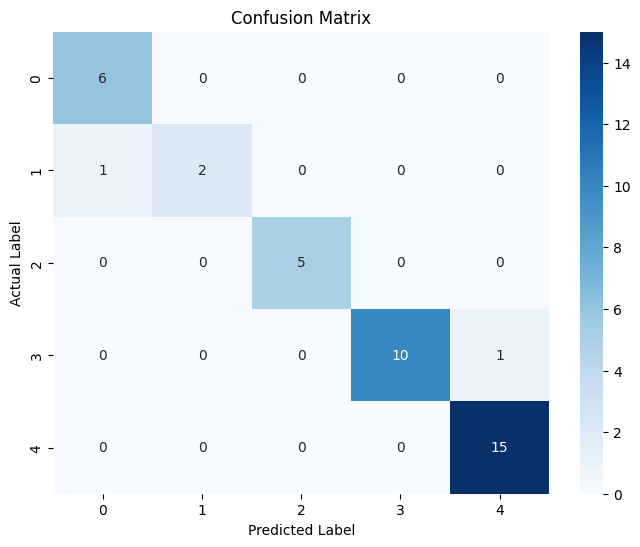

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
classification_report(y_test,res)

'              precision    recall  f1-score   support\n\n       drugA       0.86      1.00      0.92         6\n       drugB       1.00      0.67      0.80         3\n       drugC       1.00      1.00      1.00         5\n       drugX       1.00      0.91      0.95        11\n       drugY       0.94      1.00      0.97        15\n\n    accuracy                           0.95        40\n   macro avg       0.96      0.92      0.93        40\nweighted avg       0.96      0.95      0.95        40\n'

In [25]:
for importance, name in sorted(zip(dt.feature_importances_, x_train.columns),reverse=True):
  print (name, importance) #sex column has no contricution we can drop it and get the same result

Na_to_K 0.4932606291539379
BP 0.25791588652016345
Age 0.13551007894535144
Cholesterol 0.11331340538054727
Sex 0.0


<h2> Using GridSearchCV & RandomizeSearchCV for getting best parameter</h2>

In [26]:
param_grid = {
    'criterion':['gini','entropy'], #Calculating Information gain through Gini or Entropy
    'splitter':['best','random'], #split on best or random column. random can help reduce overfitiing
    'max_depth':[2,4,8,10,13], #maximum depth of tree if none then chances are of overfiting
    'max_features':['sqrt','log2',None], #max no of columns allowed we can reduce it to give some column to reduce overfitting
    'min_samples_leaf':[4,5], # resulting leaf will never have more then these numbers
}
reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
reg.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, 13],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [4, 5],
                         'splitter': ['best', 'random']})

In [27]:
reg.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [28]:
reg.best_score_ #ovf case

np.float64(1.0)

In [29]:
param_grid = {
    'criterion':['gini','entropy'], #Calculating Information gain through Gini or Entropy
    'splitter':['best','random'], #split on best or random column. random can help reduce overfitiing
    'max_depth':[2,4,8,10,13], #maximum depth of tree if none then chances are of overfiting
    'max_features':['sqrt','log2',None], #max no of columns allowed we can reduce it to give some column to reduce overfitting
    'min_samples_leaf':[4,5], # resulting leaf will never have more then these numbers
}
rcv = RandomizedSearchCV(DecisionTreeClassifier(),n_iter=10,cv=5,random_state=4,param_distributions=param_grid)
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 10, 13],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [4, 5],
                                        'splitter': ['best', 'random']},
                   random_state=4)

In [30]:
rcv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 4,
 'criterion': 'entropy'}

In [31]:
rcv.best_score_

np.float64(1.0)

<h1> lets apply gradient Decent on it </h1>

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg = LogisticRegression()

In [34]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred = lg.predict(x_test)

In [36]:
accuracy_score(y_test,pred)

0.875

In [37]:
cmm = confusion_matrix(y_test,pred)

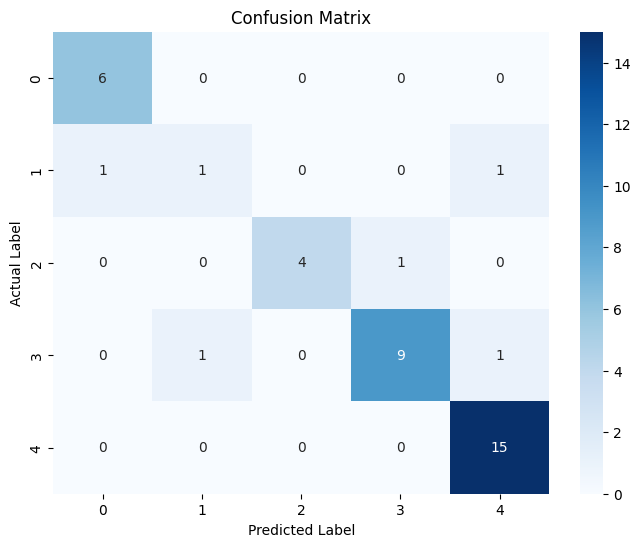

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [39]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],   # type of regularization
    'C': [0.01, 0.1, 1, 10, 50],                   # inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # solvers
    'max_iter': [100, 200, 500]                     # iterations to ensure convergence
}
reg = GridSearchCV(LogisticRegression(),param_grid=param_grid)
reg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']})

In [40]:
reg.best_score_

np.float64(0.99375)

In [41]:
reg.best_params_

{'C': 50, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
kn = KNeighborsClassifier(n_neighbors=1)

In [44]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
p = kn.predict(x_test)

In [46]:
accuracy_score(y_test,p)

0.7

In [47]:
preee = confusion_matrix(y_test,p)

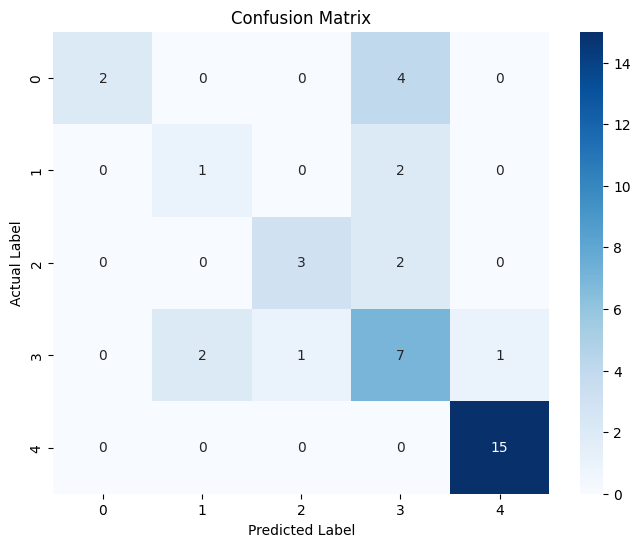

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(preee, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()